In [1]:
#Import all libraries 
import numpy as np    # linear algebra library
import pandas as pd   #Data analysis and manipulation
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Data visualization

In [2]:
import warnings          # Supressing warnings
warnings.filterwarnings('ignore')

In [3]:
# Data exploration/preparation 
data = pd.read_csv("predictive_maintenance.csv")  
data

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure  

[10000 rows x 10 columns]

In [4]:
data.describe()

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  
count            10000.000000  10000.000000     10000.000000  10000.000000  
mean              1538.776100     39.986910       107.951000      0.033900  
std                179.284096      9.968934        63.654147      0.180981  
min               1168.000000      3.800000         0.000000      0.000000  
25%               1423.000000     33.200000        53.000000      0.000000  
50%               1503.000000     40.100000       108.000000      0.000000  
75%               1612.000000     46.800000       162.000000      0.000000  
max               2886.000000     76.600000       253.000000      1.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [6]:
data['Product ID'].value_counts()

Product ID
M14860    1
L53850    1
L53843    1
L53844    1
L53845    1
         ..
M18193    1
M18194    1
L50515    1
L50516    1
M24859    1
Name: count, Length: 10000, dtype: int64

In [7]:
data['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [8]:
data['Type'].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

In [9]:
data['Air temperature [K]'].value_counts() #temp in kelvin

Air temperature [K]
300.7    279
298.9    231
297.4    230
300.5    229
298.8    227
        ... 
304.4      7
296.0      6
295.4      3
295.3      3
304.5      1
Name: count, Length: 93, dtype: int64

In [10]:
data['Process temperature [K]'].value_counts()

Process temperature [K]
310.6    317
310.8    273
310.7    266
308.6    265
310.5    263
        ... 
306.9      4
313.7      4
305.8      3
305.7      2
313.8      2
Name: count, Length: 82, dtype: int64

In [11]:
data['Rotational speed [rpm]'].value_counts()

Rotational speed [rpm]
1452    48
1435    43
1447    42
1429    40
1469    40
        ..
2197     1
2211     1
1905     1
1893     1
2450     1
Name: count, Length: 941, dtype: int64

In [12]:
data['Torque [Nm]'].value_counts()

Torque [Nm]
40.2    52
38.5    50
42.4    50
35.8    50
37.7    49
        ..
65.7     1
67.8     1
16.0     1
4.6      1
15.5     1
Name: count, Length: 577, dtype: int64

In [13]:
data['Tool wear [min]'].value_counts()

Tool wear [min]
0      120
2       69
5       63
7       58
59      58
      ... 
237      1
239      1
241      1
251      1
253      1
Name: count, Length: 246, dtype: int64

In [14]:
data['Target'].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

In [15]:
data.drop(['UDI','Product ID'], axis = 1, inplace = True)

In [16]:
# Data encoding
from sklearn.preprocessing import LabelEncoder

In [17]:
label_encoder = LabelEncoder()
data['Type'] = label_encoder.fit_transform(data['Type'])

In [18]:
data.head()

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     2                298.1                    308.6                    1551   
1     1                298.2                    308.7                    1408   
2     1                298.1                    308.5                    1498   
3     1                298.2                    308.6                    1433   
4     1                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Target Failure Type  
0         42.8                0       0   No Failure  
1         46.3                3       0   No Failure  
2         49.4                5       0   No Failure  
3         39.5                7       0   No Failure  
4         40.0                9       0   No Failure

In [19]:
data1 = label_encoder.fit_transform(data['Failure Type'])

In [20]:
label_encoder.classes_

array(['Heat Dissipation Failure', 'No Failure', 'Overstrain Failure',
       'Power Failure', 'Random Failures', 'Tool Wear Failure'],
      dtype=object)

In [21]:
data.head()

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     2                298.1                    308.6                    1551   
1     1                298.2                    308.7                    1408   
2     1                298.1                    308.5                    1498   
3     1                298.2                    308.6                    1433   
4     1                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Target Failure Type  
0         42.8                0       0   No Failure  
1         46.3                3       0   No Failure  
2         49.4                5       0   No Failure  
3         39.5                7       0   No Failure  
4         40.0                9       0   No Failure

In [22]:
data['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

array([[<Axes: title={'center': 'Type'}>,
        <Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>],
       [<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>,
        <Axes: title={'center': 'Tool wear [min]'}>],
       [<Axes: title={'center': 'Target'}>, <Axes: >, <Axes: >]],
      dtype=object)

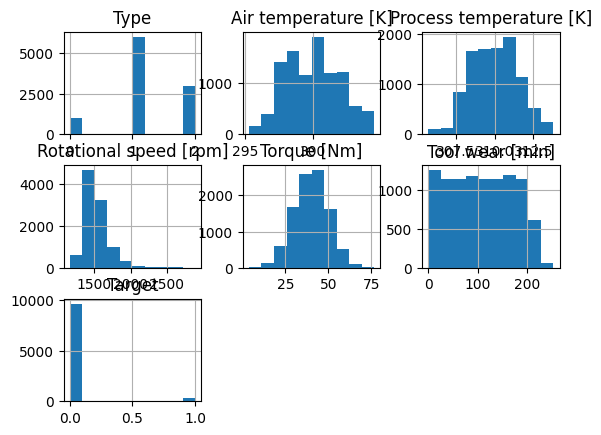

In [23]:
# Data visualization
data.hist()

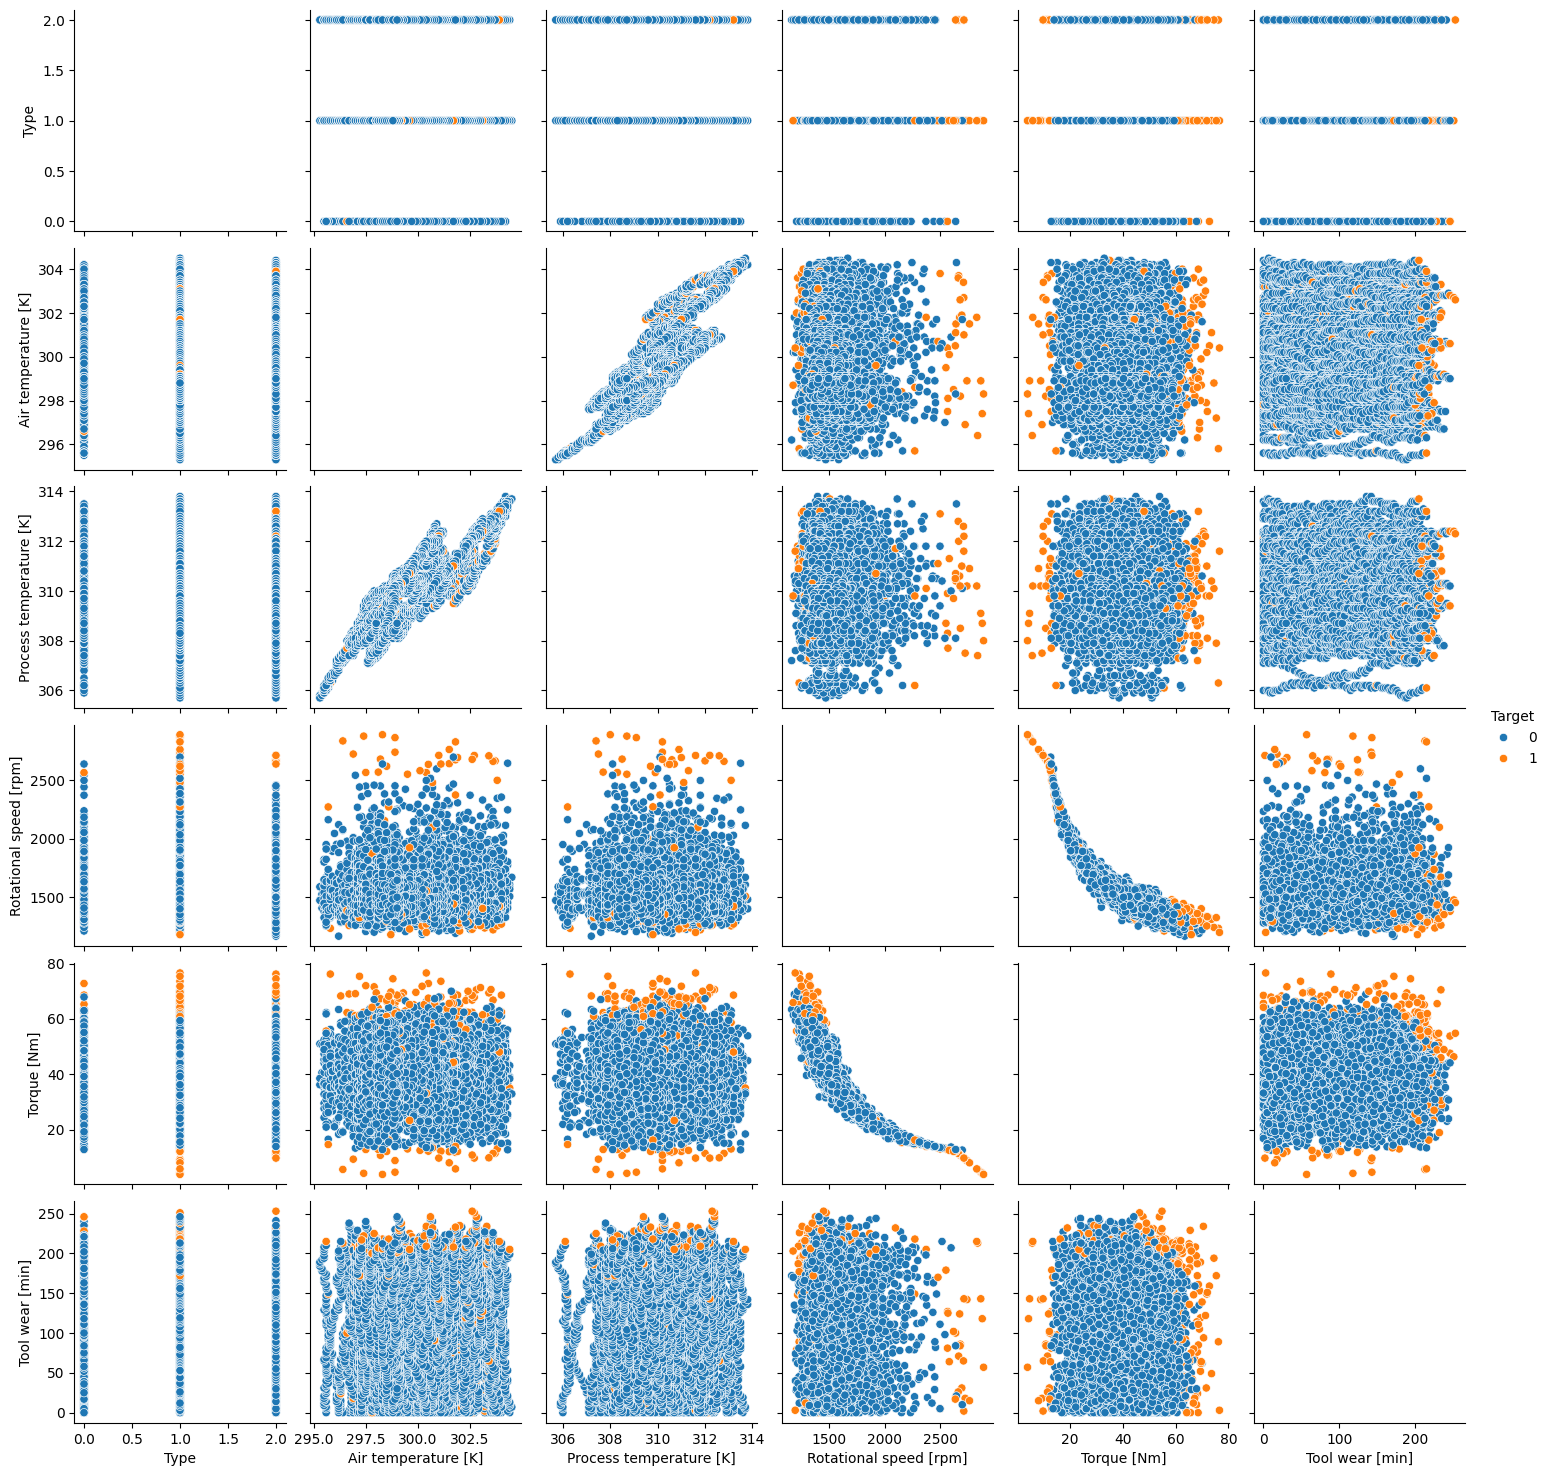

In [24]:
sns.pairplot(data,hue='Target',diag_kind='scatter')

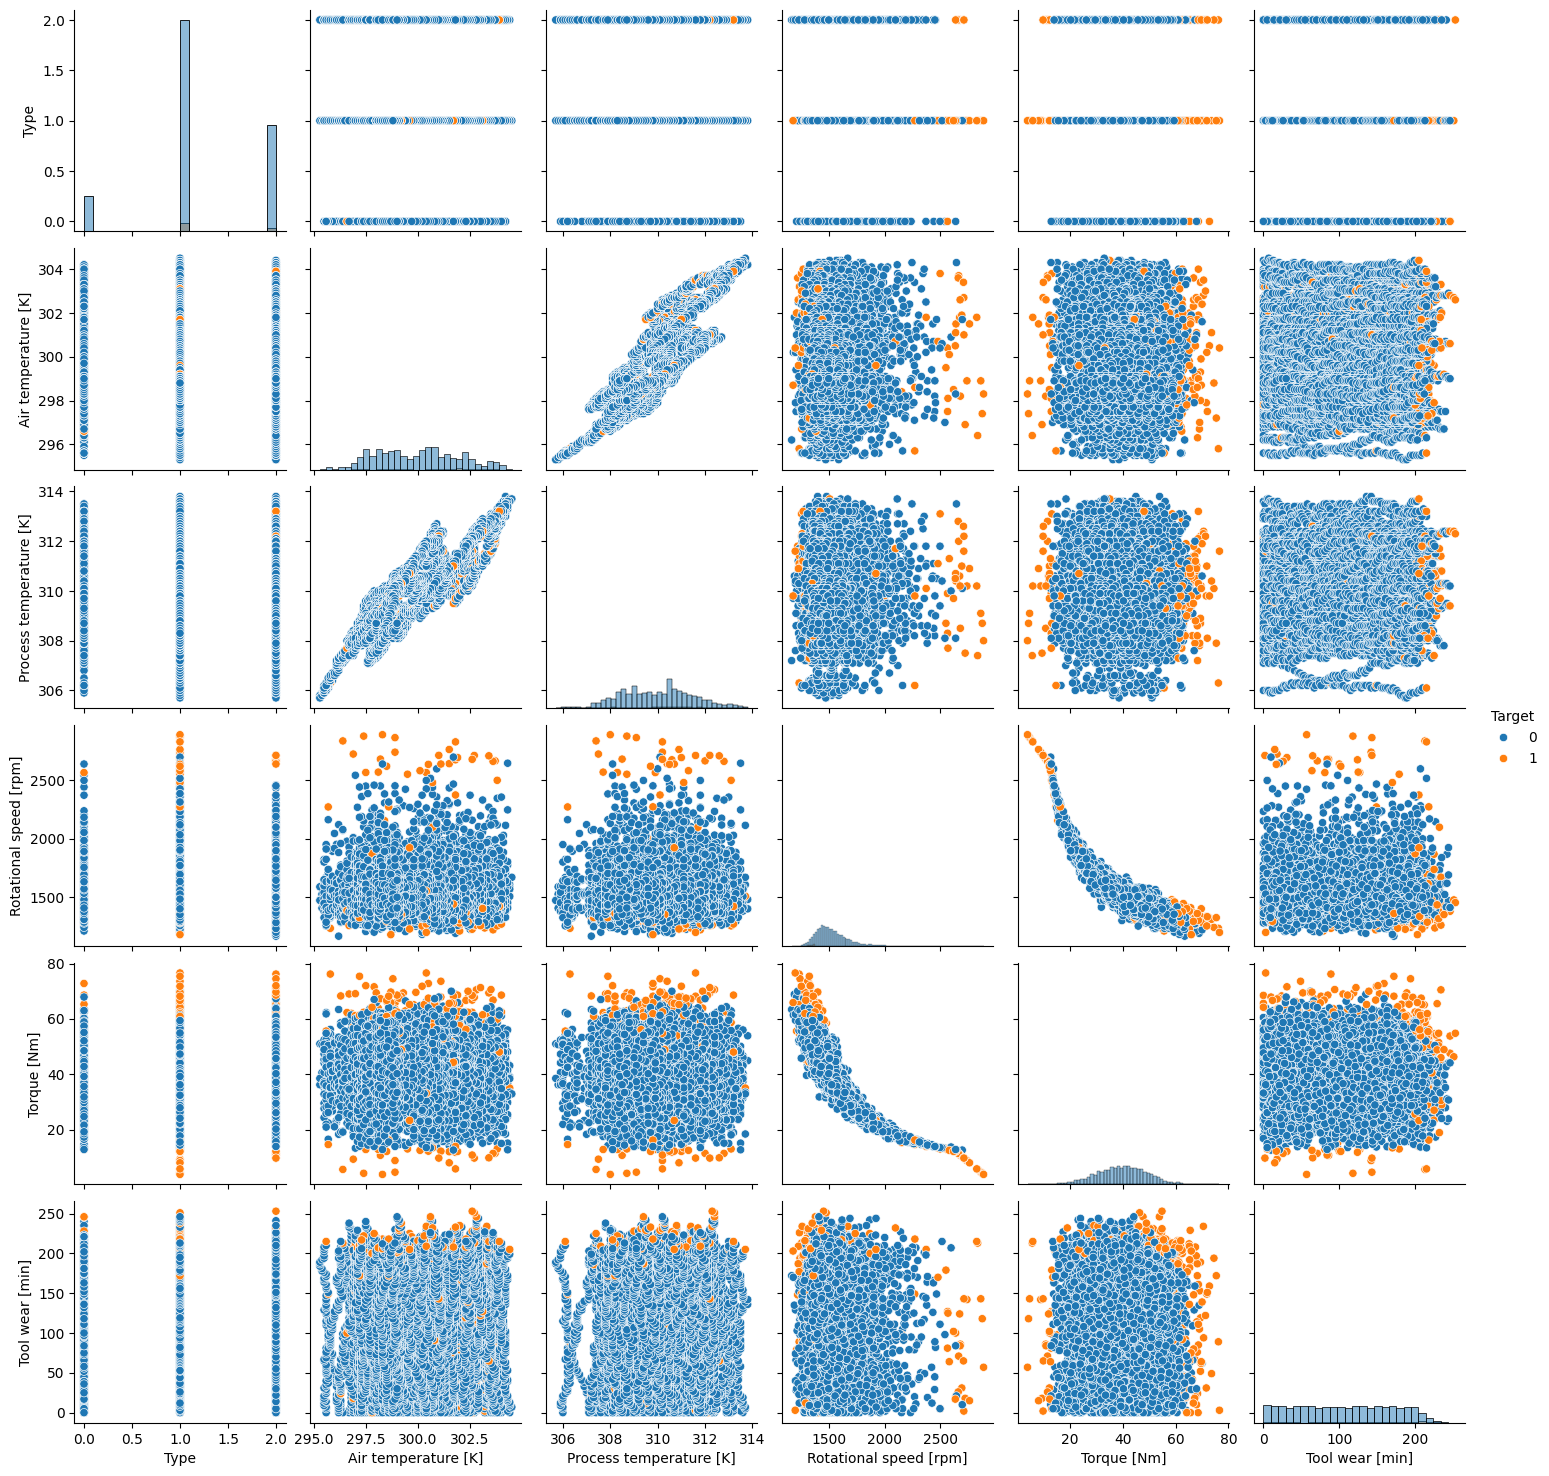

In [25]:
sns.pairplot(data,hue='Target',diag_kind='hist')

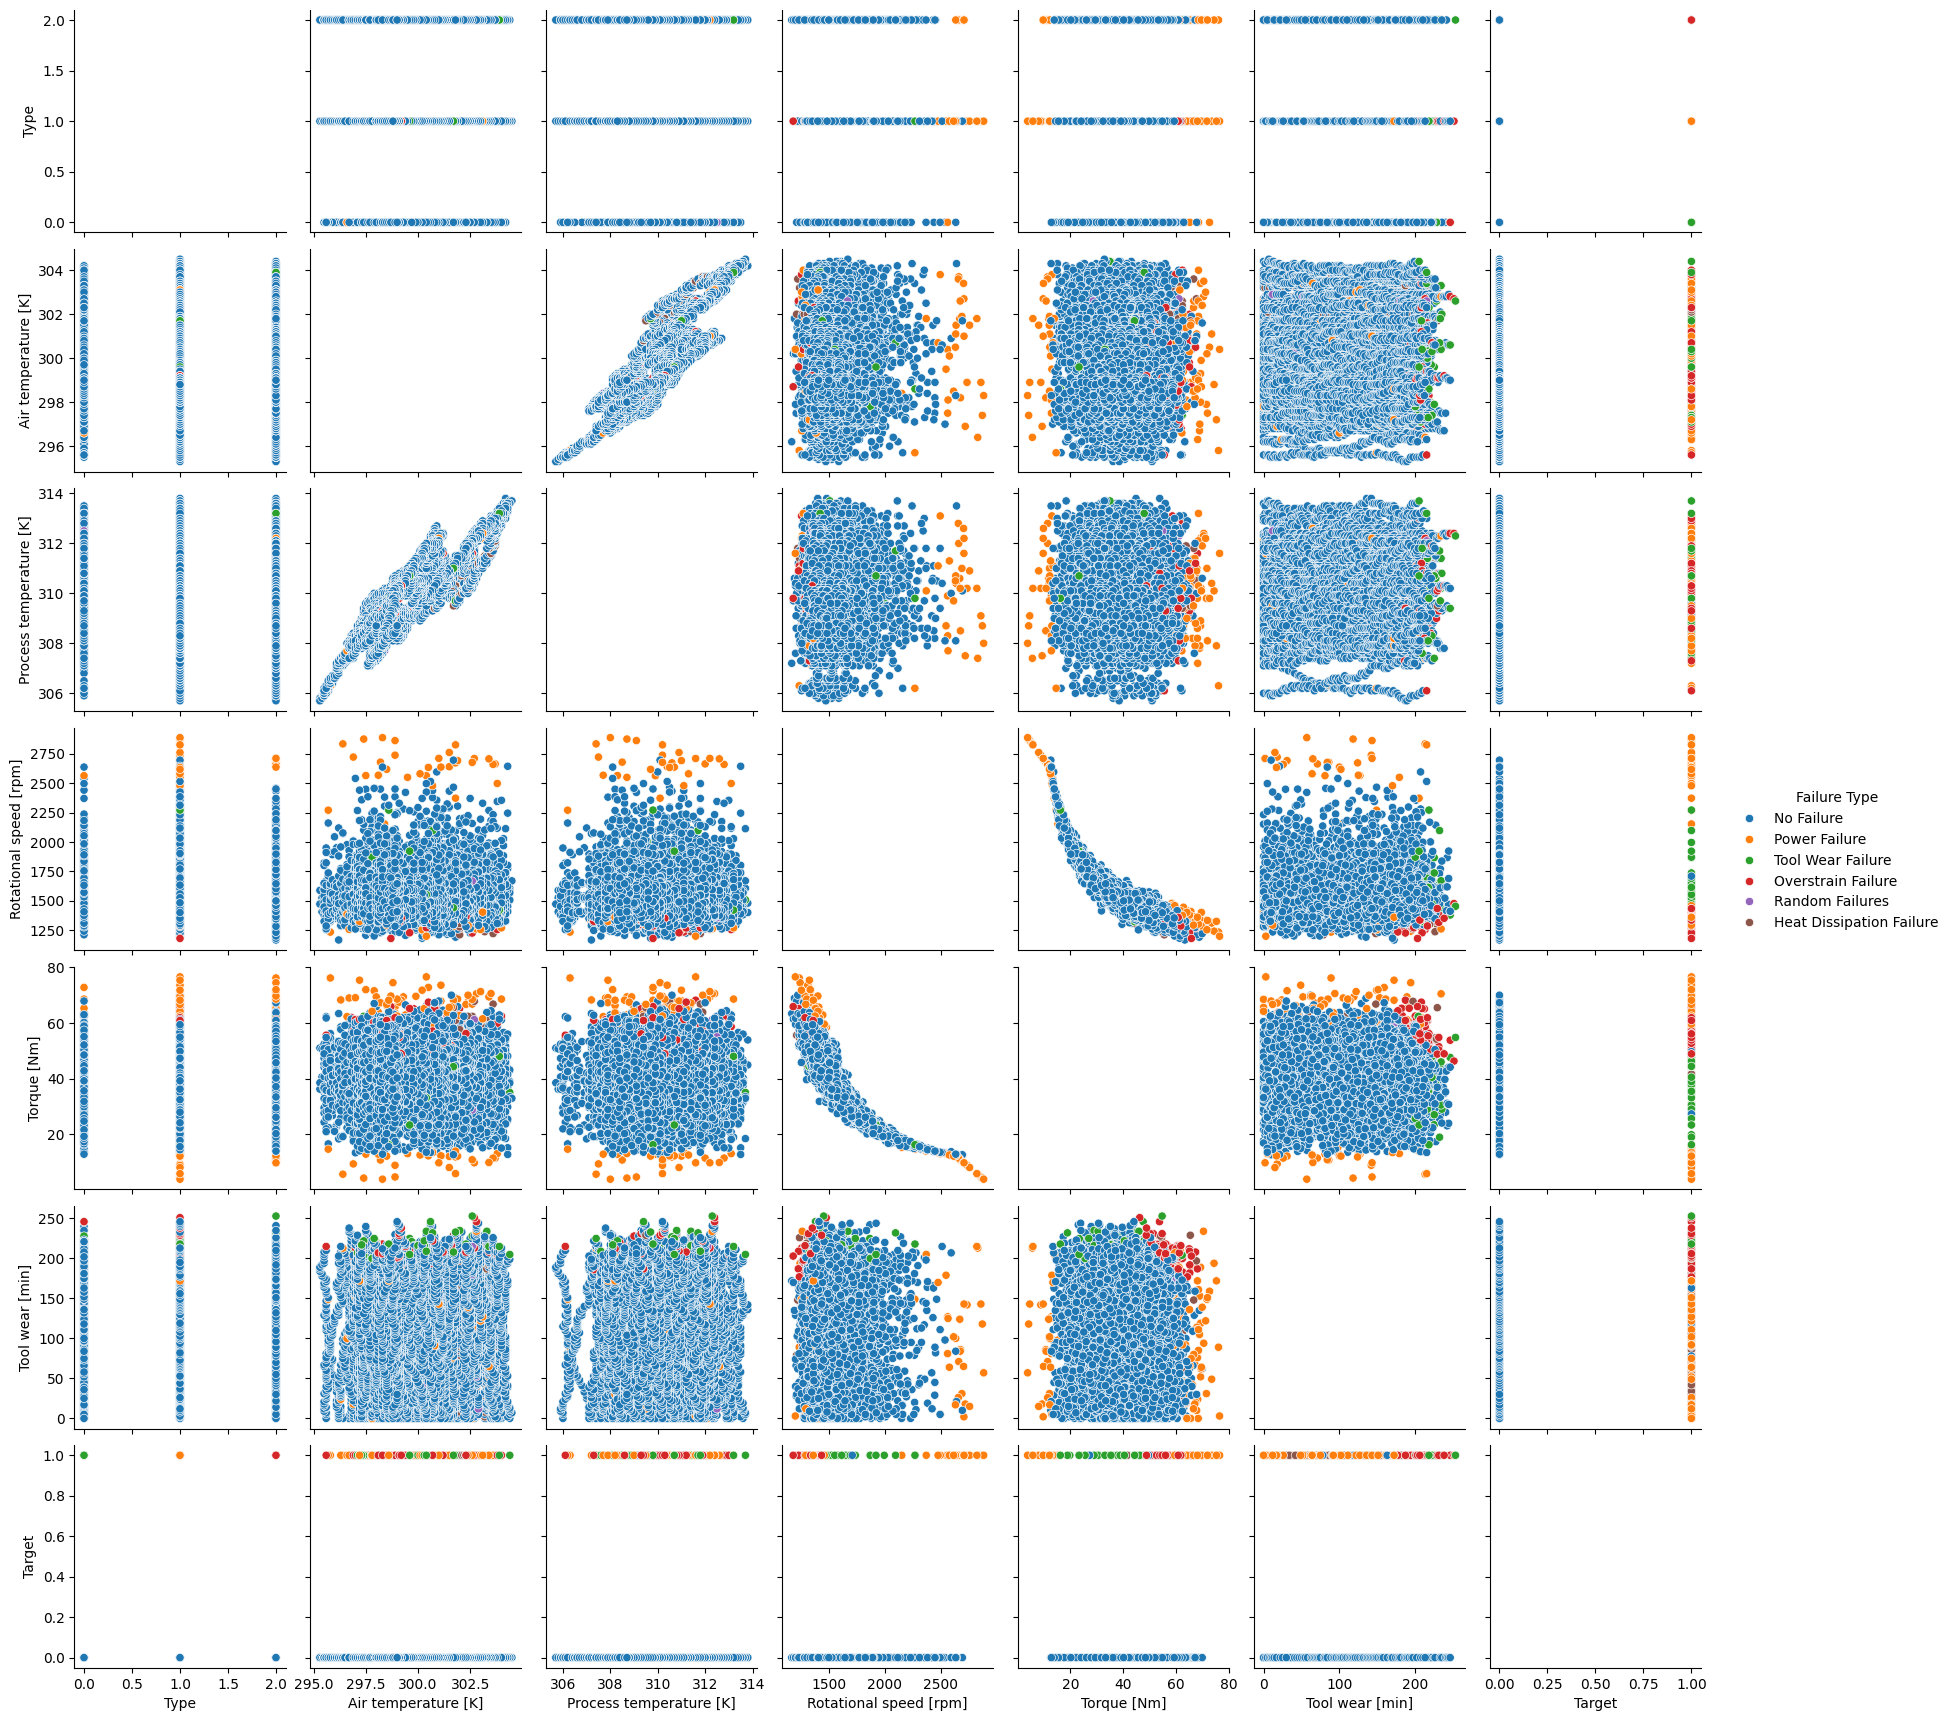

In [26]:
sns.pairplot(data,hue='Failure Type',diag_kind='scatter')

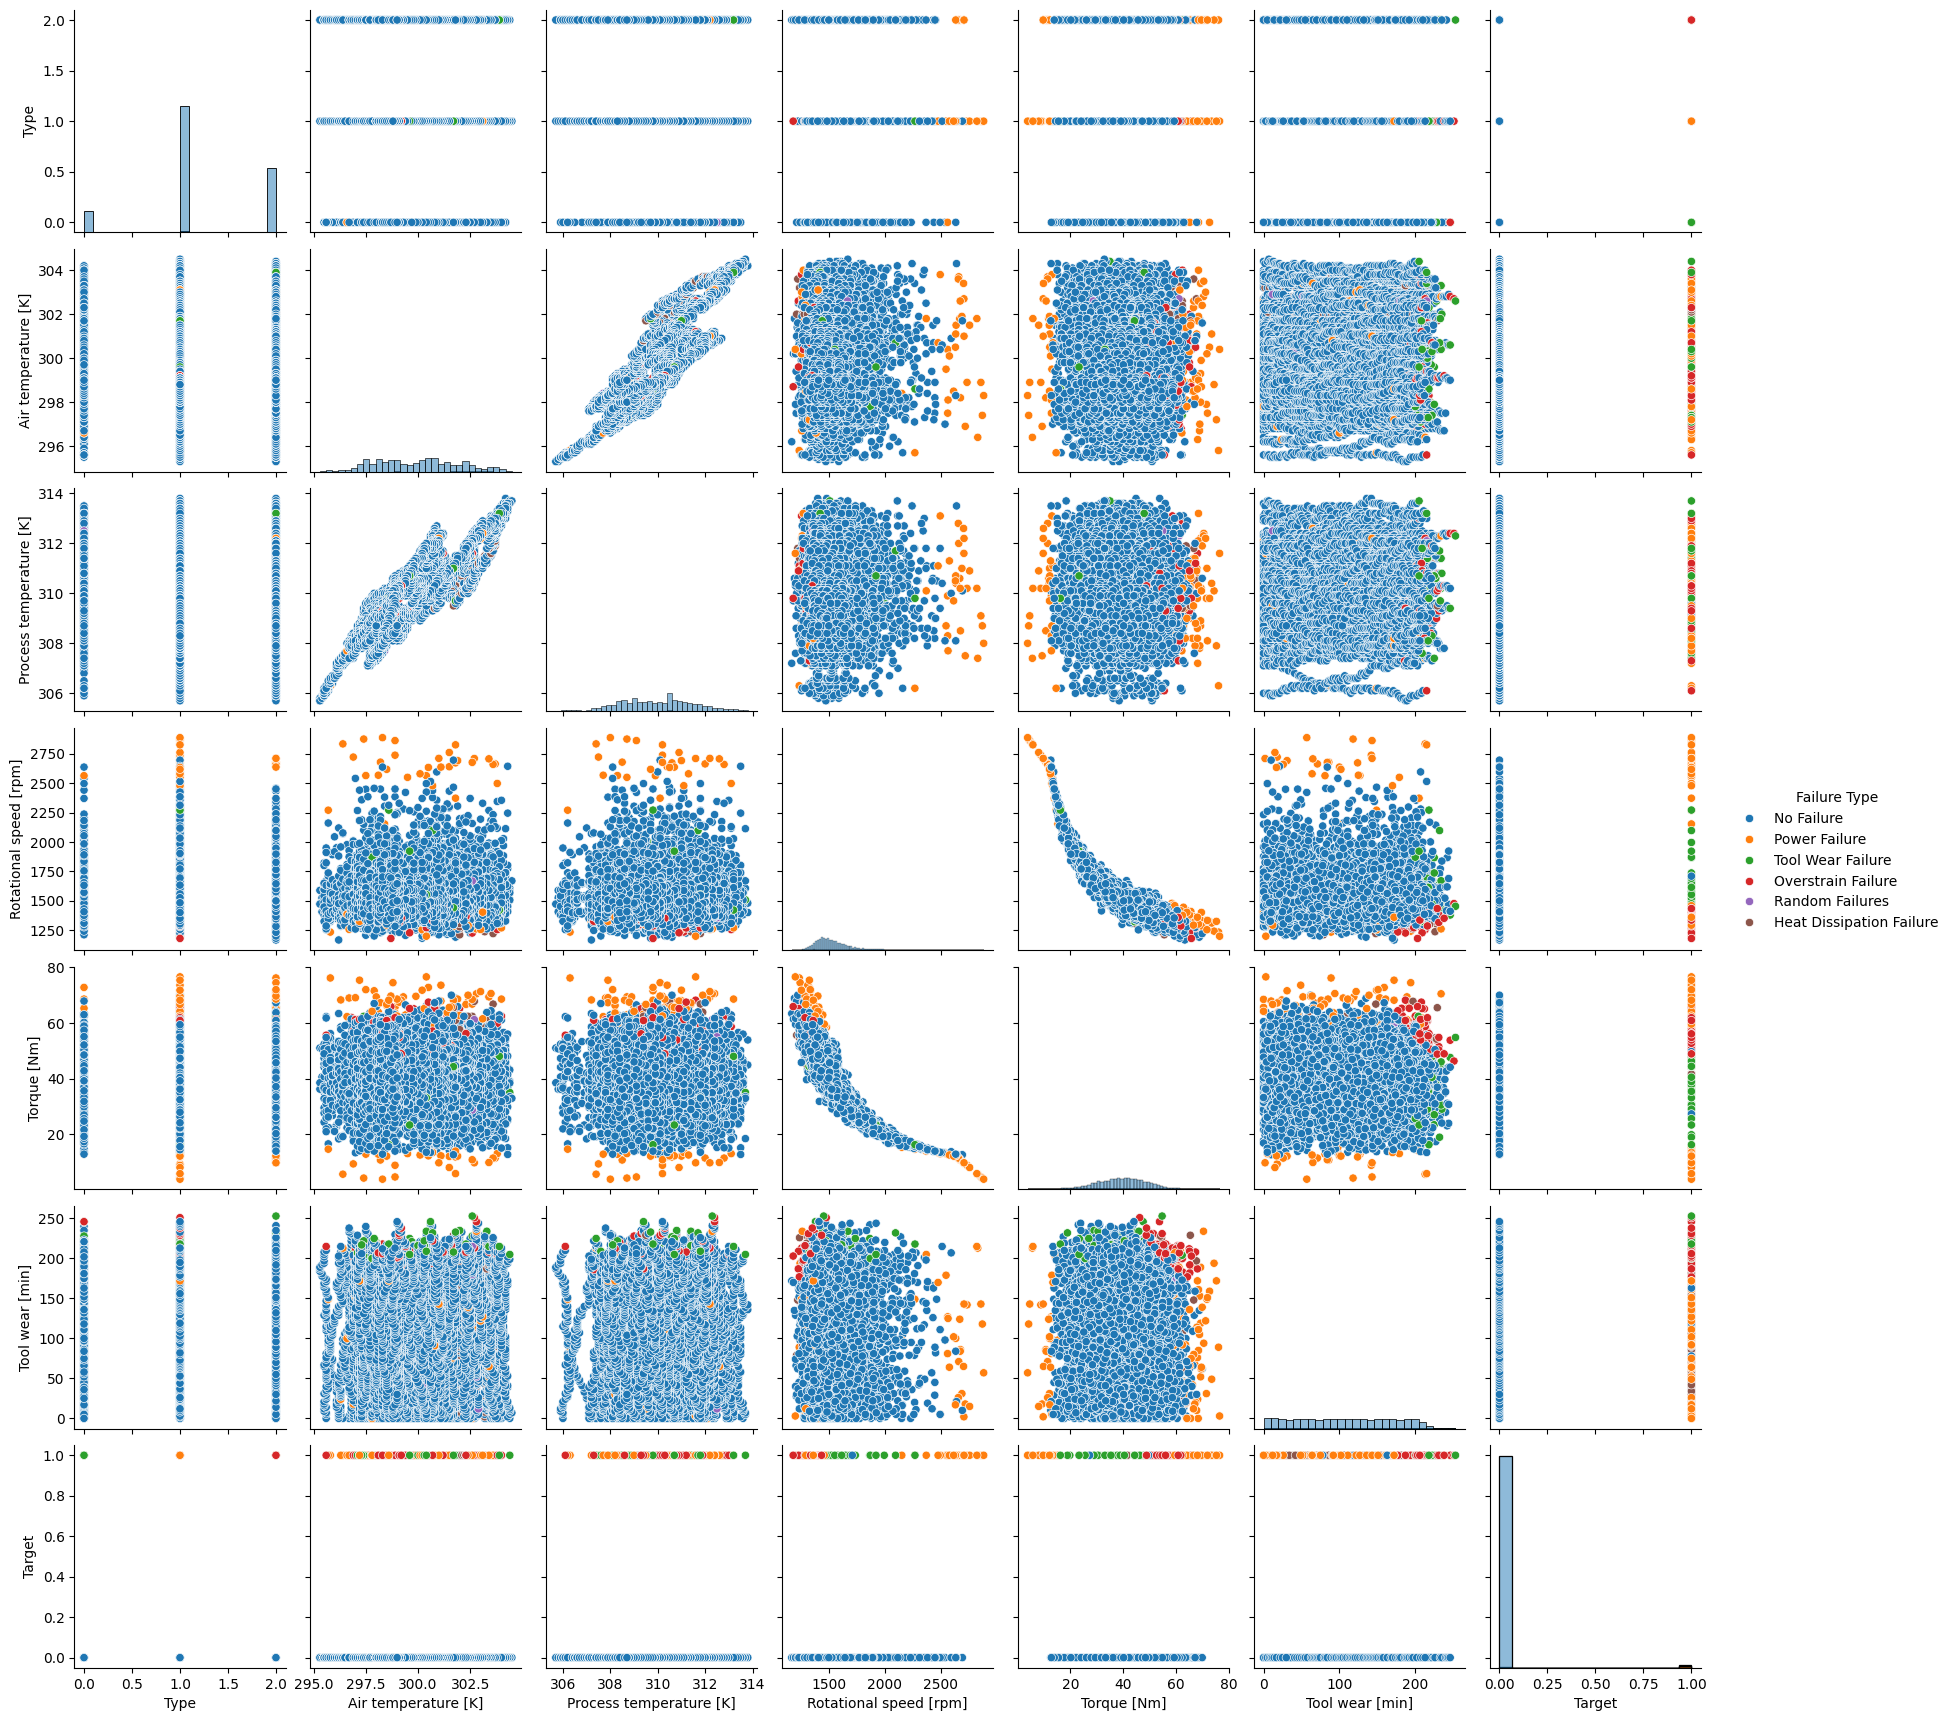

In [27]:
sns.pairplot(data,hue='Failure Type',diag_kind='hist')

In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Failure Type'] = label_encoder.fit_transform(data['Failure Type'])

<Axes: >

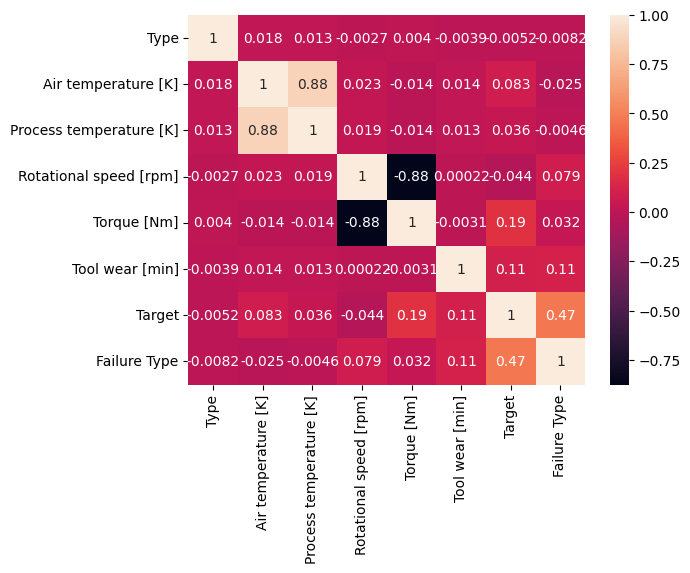

In [29]:
sns.heatmap(data.corr(),annot=True,cbar=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x2536b15add0>,
 'caps': [<matplotlib.lines.Line2D at 0x2536b170090>,
 'boxes': [<matplotlib.lines.Line2D at 0x25369bca790>],
 'medians': [<matplotlib.lines.Line2D at 0x2536b171110>],
 'fliers': [<matplotlib.lines.Line2D at 0x2536b171890>],
 'means': []}

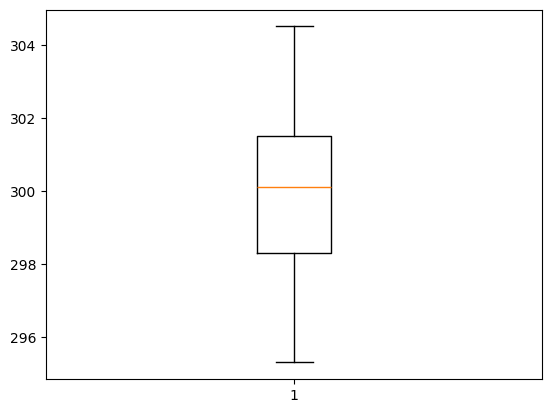

In [30]:
plt.boxplot(data['Air temperature [K]'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2536b1ccc50>,
 'caps': [<matplotlib.lines.Line2D at 0x2536b1cdf90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2536b1cc350>],
 'medians': [<matplotlib.lines.Line2D at 0x2536b1cedd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2536b1cf690>],
 'means': []}

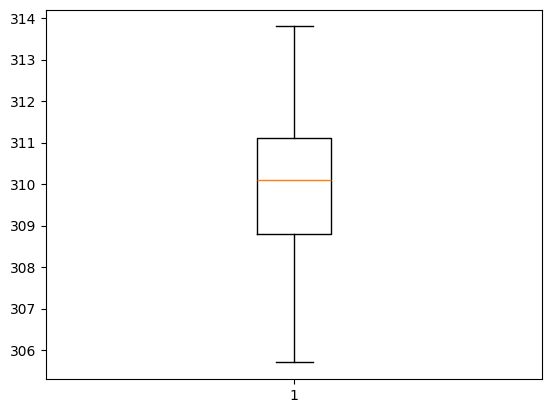

In [31]:
plt.boxplot(data['Process temperature [K]'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2536b22a4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2536b22b790>,
 'boxes': [<matplotlib.lines.Line2D at 0x2536b229d50>],
 'medians': [<matplotlib.lines.Line2D at 0x2536b240750>],
 'fliers': [<matplotlib.lines.Line2D at 0x2536b241010>],
 'means': []}

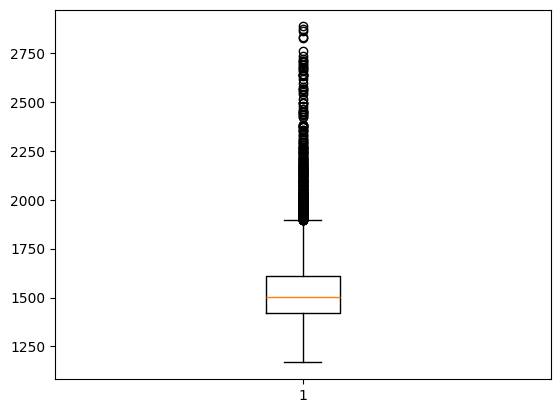

In [32]:
plt.boxplot(data['Rotational speed [rpm]'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2536b5b4950>,
 'caps': [<matplotlib.lines.Line2D at 0x2536b5b5a10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2536b5b40d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2536b5b6b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2536b5b7290>],
 'means': []}

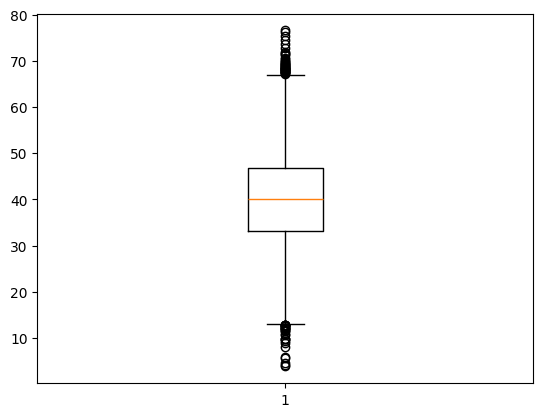

In [33]:
plt.boxplot(data['Torque [Nm]'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2536b600490>,
 'caps': [<matplotlib.lines.Line2D at 0x2536b625450>,
 'boxes': [<matplotlib.lines.Line2D at 0x2536b61ba10>],
 'medians': [<matplotlib.lines.Line2D at 0x2536b626490>],
 'fliers': [<matplotlib.lines.Line2D at 0x2536b626cd0>],
 'means': []}

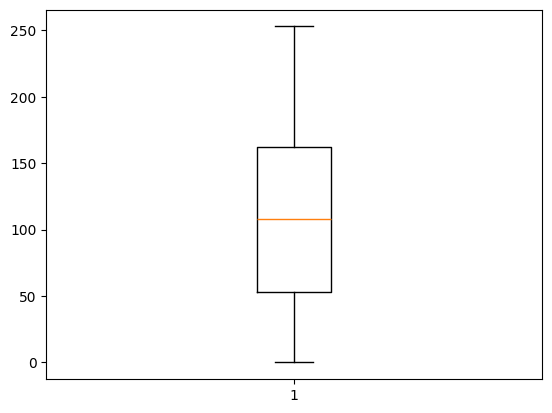

In [34]:
plt.boxplot(data['Tool wear [min]'])

In [35]:
data['Target'].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

# After encoding the data 
0 - Heat dissipation failure
1 - No failure
2 - Over strain failure
3 - Power failure
4 - Random failure
5 - Tool wear failure

In [36]:
data['Failure Type'].value_counts()

Failure Type
1    9652
0     112
3      95
2      78
5      45
4      18
Name: count, dtype: int64

In [37]:
df = data.loc[data['Target']==1]
df.to_csv("failure")

In [38]:
pd.read_csv('failure')

Unnamed: 0  Type  Air temperature [K]  Process temperature [K]  \
0            50     1                298.9                    309.1   
1            69     1                298.9                    309.0   
2            77     1                298.8                    308.9   
3           160     1                298.4                    308.2   
4           161     1                298.3                    308.1   
..          ...   ...                  ...                      ...   
334        9758     1                298.6                    309.8   
335        9764     1                298.5                    309.5   
336        9822     1                298.5                    309.4   
337        9830     1                298.3                    309.3   
338        9974     1                298.6                    308.2   

     Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                      2861          4.6              143       1   
1                      1410         65.7              191       1   
2                      1455         41.3              208       1   
3                      1282         60.7              216       1   
4                      1412         52.3              218       1   
..                      ...          ...              ...     ...   
334                    2271         16.2              218       1   
335                    1294         66.7               12       1   
336                    1360         60.9              187       1   
337                    1337         56.1              206       1   
338                    1361         68.2              172       1   

     Failure Type  
0               3  
1               3  
2               5  
3               2  
4               2  
..            ...  
334             5  
335             3  
336             2  
337             2  
338             3  

[339 rows x 9 columns]

In [39]:
# Feature colums
X = data.iloc[ : , :7]
X

Type  Air temperature [K]  Process temperature [K]  \
0        2                298.1                    308.6   
1        1                298.2                    308.7   
2        1                298.1                    308.5   
3        1                298.2                    308.6   
4        1                298.2                    308.7   
...    ...                  ...                      ...   
9995     2                298.8                    308.4   
9996     0                298.9                    308.4   
9997     2                299.0                    308.6   
9998     0                299.0                    308.7   
9999     2                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  
0                       1551         42.8                0       0  
1                       1408         46.3                3       0  
2                       1498         49.4                5       0  
3                       1433         39.5                7       0  
4                       1408         40.0                9       0  
...                      ...          ...              ...     ...  
9995                    1604         29.5               14       0  
9996                    1632         31.8               17       0  
9997                    1645         33.4               22       0  
9998                    1408         48.5               25       0  
9999                    1500         40.2               30       0  

[10000 rows x 7 columns]

In [40]:
# Target column
y = data['Failure Type']
y

0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: Failure Type, Length: 10000, dtype: int32

In [41]:
# Spliting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [42]:
# Fitting dataset in ML model/Algorithm
from sklearn.linear_model import LogisticRegression

In [43]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [44]:
# Model validation
predictions = logistic_model.predict(X_test)
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [45]:
data.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

In [46]:
# Evaluation matrics : Checking the accuracy of the model
from sklearn.metrics import accuracy_score

In [47]:
logistic_model.score(X_test, y_test)

0.973

In [48]:
logistic_model.score(X_train, y_train)

0.967625

In [49]:
# If you want to check single dataset failure type:
df = pd.DataFrame({'Type':[1],'Air temperature [K]':[298.9], 'Process temperature [K]':[309.1],
       'Rotational speed [rpm]':[2861], 'Torque [Nm]':[4.6], 'Tool wear [min]':[143], 'Target':[1]})
#x = pd.DataFrame()
test = logistic_model.predict(df)  # Output in array format
x = test.tolist()    # Converted test array to list
x

[3]

In [50]:
def fun(test):
    if test == 0:
        return "Heat dissipation failure"

    elif test == 1:
        return "No failure"

    elif test == 2:
        return "Over strain failure"

    elif test == 3:
        return "Power failure"

    elif test == 4:
        return "Random failure"

    else:
        return "Tool wear failure"
    
y = fun(test)
print(y)

Power failure


In [51]:
# To get the type of failure in machine message by using SMTP communication protocol
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
#import random

In [52]:
with open('data.txt', 'r') as file:
    for i in file:
        data = i.split(",")
        username = data[1]

In [53]:
recipient_email = username

In [54]:
with open("senddata.txt") as file:
    for i in file:
        data = i.split(",")
        
        # Zoho Mail or Gmail SMTP server details
        smtp_server = data[0]
        smtp_port = data[3] # Zoho Mail or Gmail SMTP port
        
        # Sender's email credentials
        sender_email = data[1]
        password = data[2]

In [55]:
message = MIMEMultipart()
message['From'] = sender_email
message['To'] = recipient_email
message['Subject'] = 'Test Email'

In [56]:
#random_number = random.randint(100000,999999)
body = f"This is a test email sent from Python using Gmail. This is '{y}'. "  
# create your custome msg above if you want
message.attach(MIMEText(body, 'plain'))

In [57]:
with smtplib.SMTP_SSL(smtp_server, smtp_port) as server:
    server.login(sender_email, password)  # Login to the SMTP server
    server.send_message(message)  # Send the email